# 1. Giới thiệu chung.

ở bài trước chúng ta đã tìm hiểu về học đa tác vụ ([multitask learning](https://phamdinhkhanh.github.io/2020/04/22/MultitaskLearning.html)). Thuật toán có khả năng dự báo nhiều tác vụ trên cùng một đầu vào, có sự chia sẻ đặc trưng giữa các tác vụ trong quá trình dự báo mà không cần xây dựng nhiều mô hình độc lập. Tiết kiệm được tài nguyên và thời gian huấn luyện. 

Multitask learning thường được ứng dụng trong nhiều lĩnh vực trong đó có xe tự hành, image search, sinh trắc học trên khuôn mặt, y sinh và rất nhiều các ứng dụng khác. Bạn đọc có thể tham khảo thêm về ứng dụng của multitask learning trong sinh trắc học khuôn mặt và chuẩn đoán ảnh X-quang trong hội nghị toàn cầu về xử lý ảnh [ICCV 2019](https://www.youtube.com/watch?v=9Sx2qWKGzlc&list=PLBAFw2oKatLJ7Mb8Xat6fq_oGyD7JdaNU&index=4) (từ phút thứ 60 của video) ứng dụng trong sinh trắc học trên khuôn mặt và y sinh.

Chúng ta cũng được tìm hiểu ở bài trước rằng multitask learning sẽ tương tốt trong trường hợp quá trình phân biệt các tác vụ chia sẻ nhiều đặc trưng giống nhau. Vậy đối với trừng hợp không chia sẻ đặc trưng thì multitask learning sẽ cần điều chỉnh như thế nào? Đó chính là kiến trúc rẽ nhánh mà chúng ta sẽ cùng tìm hiểu ở bài này.



# 2. Kiến trúc rẽ nhánh (multi-branch)



Kiến trúc rẽ nhánh sẽ cho phép thuật toán học được nhiều tác vụ đồng thời nhưng không chia sẻ đặc trưng. Mô hình của chúng ta sử dụng chung một đầu vào là ảnh và phân nhánh thành nhiều mô hình con. Mỗi mô hình sẽ phụ trách dự báo cho một tác vụ một cách độc lập.



Ví dụ: Trong nhận diện khuôn mặt, chúng ta sẽ cần sử dụng rất nhiều các dự báo trên cùng một ảnh khuôn mặt như: giới tính, độ tuổi, chủng tộc, màu mắt, màu tóc,....

Những tác vụ trên không chia sẻ các đặc trưng để phân biệt. Ví dụ: Khi phân biệt giới tính chúng ta dựa trên các đặc trưng về độ dài tóc, râu, lông mày, mắt, cằm và quai hàm nhiều hơn nhưng phân biệt độ tuổi chúng ta chủ yếu dựa vào nết nhăn trên khuôn mặt, màu da, màu tóc. Đây là những đặc trưng không hoàn toàn giống nhau. Do đó sử dụng kiến trúc multitask learning chia sẻ tham số cho bài toán này sẽ không hợp lý.

Một lựa chọn tốt hơn trong trường hợp này cho chúng ta đó là xây dựng một kiến trúc rẽ nhánh ngay từ input layer. Giữa các nhánh là độc lập, chỉ sử dụng chung một đầu vào mà không chia sẻ tham số.

![](https://imgur.com/JmolzPJ.png)

**Hình 1:** Kiến trúc rẽ nhánh của mô hình multitask learning trong tác vụ dự báo `age, gender, race`. Mỗi nhánh thực hiện một tác vụ như sau:

* Nhánh thứ 1: Dự báo độ tuổi dựa trên thuật toán regression.
* Nhánh thứ 2: Là một bài toán phân loại nhị phân (binary classification) dự báo giới tính.
* Nhánh thứ 3: Là một bài toán phân loại đa lớp (multiclass classification) dự báo 5 chủng tộc khác nhau của khuôn mặt.


Hàm loss function tổng quát cần tối ưu vẫn là tổng có trọng số của toàn bộ loss function trên từng nhánh model.

# 3. Ưu và nhược điểm của kiến trúc rẽ nhánh

## 3.1. Ưu điểm của kiến trúc rẽ nhánh

* Kiến trúc rẽ nhánh sẽ cho phép xây dựng được nhiều mô hình trên cùng một bộ dữ liệu.

* Các mô hình là những tác vụ độc lập và không có các đặc trưng phân loại giống nhau. 

* Khi một tác vụ hoạt động không tốt thì cũng không ảnh hưởng tới những tác vụ khác vì mối quan hệ giữa các mô hình là độc lập.

* Tiết kiệm tài nguyên và chi phí thời gian tính toán vì chúng ta huấn luyện các tác vụ đồng thời trên cùng một mô hình mà không cần huấn luyện lại từng mô hình đơn lẻ.

* Kiến trúc rẽ nhánh đồng thời cũng kết hợp được giữa các bài toán classifcation và prediction với nhau trong cùng một kiến trúc mô hình.

* Kiến trúc rẽ nhánh cho phép ta áp dụng được nhiều hàm loss function khác nhau trên các tác vụ huấn luyện khác nhau.


## 3.2. Nhược điểm của kiến trúc rẽ nhánh

* Kiến trúc rẽ nhánh thường yêu cầu các mô hình phải có input image cùng một shape. Một số tác vụ dự báo chỉ cần một shape nhỏ hơn cũng đã cho kết quả tốt nên sẽ gây lãng phí tài nguyên tính toán nếu tất cả các mô hình sử dụng chung một high resolution image.

* Loss function của kiến trúc rẽ nhánh rất đa dạng, trong đó một số tác vụ có thể có loss function đóng góp đa số vào loss function tổng quát cuối cùng. Do đó cần thiết lập trọng số cho loss function để cân bằng ảnh hưởng của chi phí mất mát giữa các tác vụ.

Để hiểu rõ hơn ưu và nhược điểm của kiến trúc rẽ nhánh, chúng ta sẽ cùng đi vào phần thực hành.



# 4. Thực hành xây dựng mô hình multitask learning

## 4.1. Dataset

Bộ dữ liệu về face được sử dụng là [UTKFace](https://susanqq.github.io/UTKFace/). Bộ dữ liệu bao gồm ảnh của đa dạng các sắc tộc, giới tính, độ tuổi.

Tên các files ảnh được đặt theo cấu trúc: `[age]_[gender]_[race]_[date&time].jpg` Trong đó:

* [age]: độ tuổi, giá trị là một số nguyên từ 0 đến 116.
* [gender]: giới tính.
* [race]: chủng tộc, giá trị là số nguyên từ 0-4 lần lượt tương ứng với 5 sắc tộc da trắng, da đen, châu á, ấn độ và sắc tộc khác (như người tây ban nha, châu mỹ latin, trung đông).
* [date&time]: ngày tháng chụp ảnh có định dạng yyyymmddHHMMSSFFF.


Để thực hành thì các bạn chỉ cần download file [crop_part1.tar.gz](https://drive.google.com/drive/folders/0BxYys69jI14kU0I1YUQyY1ZDRUE) là những ảnh khuôn mặt đã được crop bằng cách thêm lỗi tắt vào google drive. Nhớ sắp xếp chúng vào cùng thư mục với file notebook.


![](https://imgur.com/UL7oxDD.png)


Bạn đọc mở file sau đây để thực hành [Multitask learning - Multi branch Google Colab](https://colab.research.google.com/drive/1hmZxj3s9KScWUCbAi3MhlWtQL9XxzJdxhttps://colab.research.google.com/drive/1hmZxj3s9KScWUCbAi3MhlWtQL9XxzJdx) hoặc thực hiện tuần tự theo các step ở file này.


Mount google drive đến folder chứa colab notebook file.





In [1]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Colab Notebooks/MultitaskLearning'
os.chdir(path)
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
 Bai34MultitaskLearning        MultitaskLearning.ipynb
 checkpoint		       MultitaskLearning_MultiBranchOutput.ipynb
 crop_part1		      'UTKface_Aligned&cropped'
 multi-output-classification   UTKface_crop_part1
 multitaskLearning


Sau đó chúng ta giải nén `UTKface_crop_part1/crop_part1.tar.gz` bằng lện tar.

In [0]:
!tar -xvf UTKface_Aligned\&cropped/crop_part1.tar.gz

Tiếp theo chúng ta sẽ trích lọc các nhãn từ link ảnh bao gồm: `age, gender, race`.

In [2]:
import glob2
imagePaths = glob2.glob('crop_part1/*')
print('Number of images', len(imagePaths))

# Extract age, gender, race từ link ảnh

multiLabels = []
ages = []
genders = []
races = []
linkImages = []

for i, imageLink in enumerate(imagePaths):
  try:
    age, gender, race, _ = imageLink.split('/')[1].split('_')
    linkImages.append(imageLink)
  except:
    next
  age = int(age)
  gender = int(gender)
  race = int(race)
  multiLabels.append((age, gender, race))
  ages = [label[0] for label in multiLabels]
  genders = [label[1] for label in multiLabels]
  races = [label[2] for label in multiLabels]

dict_labels = {'ages': ages,
               'genders': genders,
               'races': races,
               'linkImages': linkImages}

Number of images 0


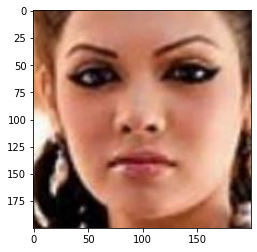

In [0]:
import matplotlib.pyplot as plt

X = plt.imread('crop_part1/27_1_3_20170104232751618.jpg.chip.jpg')
plt.imshow(X)

Tiếp theo chúng ta sẽ kiểm tra phân phối giữa các nhóm trong cùng một biến nhằm phát hiện những bất thường về dữ liệu như hiện tượng mất cân đối nghiêm trọng giữa các nhóm.

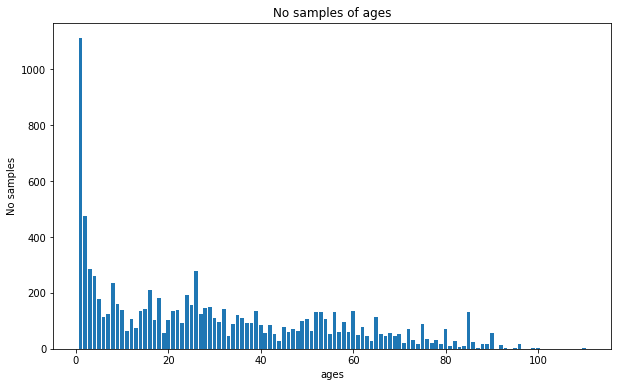

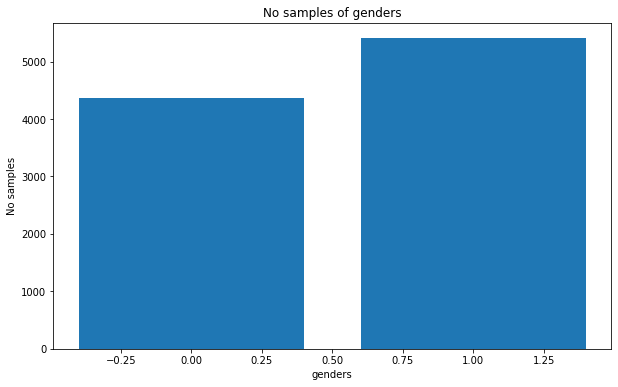

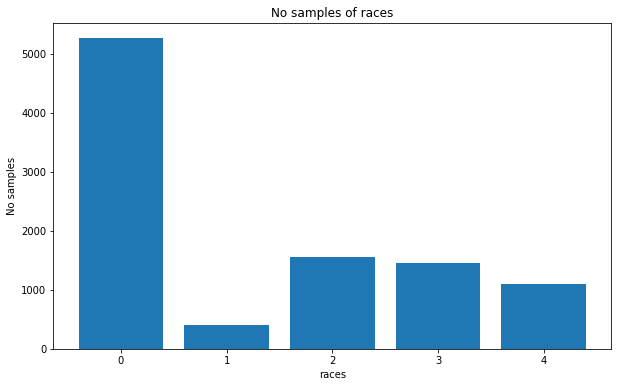

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def _plot_bar(varname):
  labels, values = np.unique(dict_labels[varname], return_counts = True)
  plt.figure(figsize=(10, 6))
  ax = plt.subplot()
  ax.bar(x=labels, height=values)
  ax.set_title('No samples of ' + varname)
  ax.set_xlabel(varname)
  ax.set_ylabel('No samples')
  plt.show()

_plot_bar('ages')
_plot_bar('genders')
_plot_bar('races')

Nhìn vào số liệu ta có thể thấy:

* Bộ dữ liệu có nhiều ảnh của trẻ sơ sinh và người từ 20-30 tuổi. Tỷ lệ người già chiếm một phần thiểu số.
* Tỷ lệ người da trắng chiếm đa số trong bộ dữ liệu (khoảng 5000 ảnh và trên 50%), ít nhất là người da đen (chỉ khoảng 3-5%) và các chủng tộc còn lại chiếm tỷ lệ giao động từ 10-15%.
* Có hiện tượng mất cân bằng giới tính, Giới tính nữ (nhãn 1) nhiềm hơn nam (nhãn 0).

Trong trường hợp này chúng ta có thể thực hiện một số biện pháp data augumentation để tăng cường thêm ảnh cho những nhóm thiểu số. Tuy nhiên với mục đích chính là hiểu rõ thuật toán mình sẽ bỏ qua bước này.

## 4.2. Mô hình

Mỗi một lượt huấn luyện, toàn bộ các mô hình con sẽ có chung một ảnh đầu vào. Sau đó từ đầu vào sẽ rẽ nhánh tới từng mô hình con phục vụ cho các mục tiêu dự báo khác nhau về `age, gender, race`. Mỗi một mô hình con sẽ sử dụng một mạng Convolutional Neural Network với cùng kích thước inputshape là ảnh `96 x 96 x 3`. 

**Thêm ảnh về kiến trúc các nhánh mô hình**

Các hàm `_age_basenetwork()`, `_gender_basenetwork()`, `_race_basenetwork()` sẽ có tác dụng khởi tạo những mô hình con CNN tương ứng với các tác vụ phân loại `age, gender` và `race`.

In [0]:
%tensorflow_version 2.x

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, DepthwiseConv2D, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

INPUT_SHAPE = (96, 96, 3)
N_AGES = 1
N_GENDERS = 1
N_RACES = 5

class AgeGenderRaceNet(object):
  def _age_basenetwork(inputs, classes = N_AGES, finAct = 'linear'):
    # DepthWiseCONV => CONV => RELU => POOL
    x = DepthwiseConv2D(kernel_size=(3, 3), 
                        padding="same", activation='relu')(inputs)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3, 3))(x)
    x = Dropout(0.25)(x)

    # (CONV => RELU) * 4 => POOL
    x = Conv2D(filters=64, kernel_size=(3, 3), padding="same",
          activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), padding="same",
          activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), padding="same",
          activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters=1024, kernel_size=(3, 3), padding="same",
          activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # first (and only) set of FC => RELU layers
    x = Flatten()(x)
    x = Activation("relu")(x)

    # softmax classifier
    x = Dense(classes)(x)
    x = Activation(finAct, name="age_output")(x)

    return x
    
  def _gender_basenetwork(inputs, classes = N_GENDERS, finAct = 'sigmoid'):
    # CONV => RELU => POOL
    x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3, 3))(x)
    x = Dropout(0.25)(x)

    # CONV => RELU => POOL
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # CONV => RELU => POOL
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # MLP classifier
    # Số units của output phải bằng số lượng nhóm giới tính
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Dense(classes)(x)
    x = Activation(finAct, name="gender_output")(x)

    return x

  def _race_basenetwork(inputs, classes = N_RACES, finAct = 'softmax'):
    # CONV => RELU => POOL
    x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3, 3))(x)
    x = Dropout(0.25)(x)

    # CONV => RELU => POOL
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    # CONV => RELU => POOL
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # MLP classifier
    # Số units của output phải bằng số lượng nhóm sắc tộc
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Dense(classes)(x)
    x = Activation(finAct, name="race_output")(x)

    return x

  @staticmethod
  def build(inputShape=INPUT_SHAPE, numGender = N_GENDERS, numRace = N_RACES):
    inputs = Input(shape=INPUT_SHAPE)
    ageBranch=AgeGenderRaceNet._age_basenetwork(inputs=inputs,
      classes=1, finAct='linear')
    genderBranch=AgeGenderRaceNet._gender_basenetwork(inputs=inputs,
      classes = numGender, finAct='sigmoid')
    raceBranch=AgeGenderRaceNet._race_basenetwork(inputs=inputs,
      classes = numRace, finAct='softmax')

    # Tạo một mô hình sử dụng đầu vào là một batch images, sau đó mô hình sẽ 
    # rẽ nhánh, một nhánh xác định đặc trưng của colors và một nhánh xác định đặc trưng của fashion
    model = Model(
      inputs=inputs,
      outputs=[ageBranch, genderBranch, raceBranch],
      name="age_gender_race_net")

    return model

model = AgeGenderRaceNet.build(inputShape=INPUT_SHAPE, numGender = N_GENDERS, numRace = N_RACES)
model.summary()

Model: "age_gender_race_net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
depthwise_conv2d_1 (DepthwiseCo (None, 96, 96, 3)    30          input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 96, 96, 3)    12          depthwise_conv2d_1[0][0]         
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 96, 96, 32)   896         batch_normalization_14[0][0]     
________________________________________________________________________________

Mô hình dự đoán tuổi sẽ có nhiều classes hơn, do đó kiến trúc mạng được thiết kế sẽ sâu hơn so với mô hinh dự đoán chủng tộc và giới tính.

Kiến trúc của các mô hình con đều rất đơn giản. Đó là các layer `[CONV*m-MAXPOOLING*n]*p` liên tiếp nhau.

## 4.3. Huấn luyện mô hình

Để huấn luyện mô hình mình sẽ sử dụng ImageGenerator, bạn đọc xem lại [Bài 32 - Kĩ thuật tensorflow Dataset](https://phamdinhkhanh.github.io/2020/04/09/TensorflowDataset.html#321-s%E1%BB%AD-d%E1%BB%A5ng-imagegenerator) để hiểu thêm về ImageGenerator.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_aug = ImageDataGenerator(rotation_range=25, 
                         width_shift_range=0.1, height_shift_range=0.1, 
                         shear_range=0.2, zoom_range=0.2,
	                       horizontal_flip=True, fill_mode="nearest")

Optimizer mình sử dụng là Adam với learning rate được khởi tạo là 0.005.

In [0]:
LR_RATE = 0.005
EPOCHS = 50
opt = Adam(lr=LR_RATE, decay=LR_RATE / EPOCHS)

Đối với hai bài toán phân loại gender và race chúng ta sử dụng hàm loss function dạng cross entropy. Giả sử bài toán phân loại có $C$ classes output. $y_{i}$ là giá trị thực tế của output và $\hat{y}_{i}$ là giá trị dự báo từ mô hình. Khi đó:
 

$$\mathcal{L}(\mathbf{W}; \mathbf{X}) = -\sum_{i=1}^{N}\sum_{j=1}^{C} y_{ij}.\log(\hat{y}_{ij})$$

Tuy nhiên đối với Age có thể coi là một biến liên tục, thay vì xây dựng một mô hình classification thì chúng ta sẽ coi đây là một bài toán dự báo với biến liên tục. Hàm loss function được sử dụng sẽ là MSE:

$$\mathcal{L}(\mathbf{W}; \mathbf{X}) = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_{i} - y_{i})^2$$

Loss function tổng quát sẽ bằng tổng loss function ở cả 3 nhánh.

Hàm MSE sẽ có trị số lớn gấp nhiều lần so với cross entropy nên để giảm ảnh hưởng của MSE ta sẽ thiết lập trọng số loss function của age nhỏ hơn so với gender và race.

In [0]:
losses = {
	"age_output": "mean_squared_error",
	"gender_output": "binary_crossentropy",
	"race_output": "sparse_categorical_crossentropy"
}

lossWeights = {"age_output": 0.03, "gender_output": 1.0, "race_output": 1.0}
model.compile(loss=losses, loss_weights= lossWeights, optimizer=opt, metrics=['accuracy'])

### 4.3.1. Phân chia tập train/validation

Như thường lệ chúng ta sẽ phân chia tập train và validation theo tỷ lệ 80/20. Tập train cho huấn luyện và tập validation cho kiểm định.


In [0]:
import cv2
import numpy as np

# Phân chia tập train/validation theo tỷ lệ 80/20
n_samples = len(dict_labels['linkImages'])
indices = np.arange(n_samples)
np.random.shuffle(indices)
n_train = int(0.8*n_samples)
index_train, index_val = indices[:n_train], indices[n_train:]
image_train, image_val = [], []
gender_train, gender_val = [], []
race_train, race_val = [], []
label_train, label_val = [], []

def _image_path(index_train):
  image_train = []
  label_train = []
  age_train = []
  gender_train = []
  race_train = []
  for i in index_train:
    imagePath = dict_labels['linkImages'][i]
    # Đọc dữ liệu ảnh
    image = cv2.imread(imagePath)
    image = cv2.resize(image, INPUT_SHAPE[:2])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.array(image)
    image_train.append(image)
    # Gán nhãn cho age, gender, race
    age_train.append(dict_labels['ages'][i])
    gender_train.append(dict_labels['genders'][i])
    race_train.append(dict_labels['races'][i])
    label_train.append([dict_labels['ages'][i], dict_labels['genders'][i], dict_labels['races'][i]])
  
  # Stack list numpy array của ảnh thành một array
  image_train = np.stack(image_train)
  # label_train = np.stack(label_train)
  age_train = np.stack(age_train)
  gender_train = np.stack(gender_train)
  race_train = np.stack(race_train)
  image_train = image_train/255.0
  return image_train, label_train, age_train, gender_train, race_train

image_train, label_train, age_train, gender_train, race_train = _image_path(index_train)
image_val, label_val, age_val, gender_val, race_val = _image_path(index_val)

### 4.3.2. Huấn luyện mô hình

Chúng ta sẽ huấn luyện mô hình qua 50 epochs. Sử dụng checkpoint để lưu model có loss function nhỏ nhất trên validation và đồng thời backup mô hình sau mỗi 20 epochs.

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

if not os.path.exists('checkpoint'):
	os.mkdir('checkpoint')


cp_callback = ModelCheckpoint(
    filepath='checkpoint', 
    verbose=1, 
    save_weights_only=False,
    save_freq=20)

history = model.fit(
	image_train, {"age_output": age_train, "gender_output": gender_train, "race_output": race_train},
	validation_data=(image_val, {"age_output": age_val, "gender_output": gender_val, "race_output": race_val}),
	batch_size=32,
	steps_per_epoch=len(image_train) // 32,
	epochs=EPOCHS, verbose=1,
	callbacks=[cp_callback])

Epoch 1/50
 19/244 [=>............................] - ETA: 38:24 - loss: 29.2699 - age_output_loss: 924.0161 - gender_output_loss: 0.5985 - race_output_loss: 0.9509 - age_output_accuracy: 0.0724 - gender_output_accuracy: 0.6711 - race_output_accuracy: 0.6645
Epoch 00001: saving model to checkpoint
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: checkpoint/assets
 39/244 [===>..........................] - ETA: 36:41 - loss: 20.2688 - age_output_loss: 624.6887 - gender_output_loss: 0.5958 - race_output_loss: 0.9323 - age_output_accuracy: 0.0825 - gender_output_accuracy: 0.6851 - race_output_accuracy: 0.6651
Epoch 00001: saving model to checkpoint
INFO:tensorflow:Assets written to: checkpoint/assets
 59/244 [======>.......................] - ETA: 33:46 - loss: 16.6293 - age_output_loss: 503.2106 - gender_output_loss: 0.5911 - race_output_loss: 0.9419 - age_output_accuracy: 0.0842 - gender_output_accuracy: 0.6827 - race_ou

### 4.3.4. Huấn luyện lại mô hình

Quá trình huấn luyện sẽ khá tốn thời gian. Mình huấn luyện 4 epochs trên google colab hết khoảng 2 tiếng. Để huấn luyện lại mô hình từ checkpoint các bạn chỉ cần load lại model. Các trạng thái của optimizer như learning rate, gradient descent đã được lưu lại. Chúng ta sẽ chỉ cần retrain lại mô hình.

In [0]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

LR_RATE = 0.001
EPOCHS = 50
opt = Adam(lr=LR_RATE, decay=LR_RATE / EPOCHS)
model = load_model('checkpoint')
model.compile(loss=losses, loss_weights= lossWeights, optimizer=opt, metrics=['accuracy'])

cp_callback = ModelCheckpoint(
    filepath='checkpoint', 
    verbose=1, 
    save_weights_only=False,
    save_freq=20)

history = model.fit(
	image_train, {"age_output": age_train, "gender_output": gender_train, "race_output": race_train},
	validation_data=(image_val, {"age_output": age_val, "gender_output": gender_val, "race_output": race_val}),
	batch_size=32,
	steps_per_epoch=len(image_train) // 32,
	epochs=EPOCHS, verbose=1,
	callbacks=[cp_callback])

### 4.3.5. Dự báo độ tuổi, giới tính và chủng tộc

Từ mô hình sau huẩn luyện, chúng ta có thể load lại chúng từ checkpoint và dự báo cho đồng thời các tác vụ. Output của chúng ta sẽ là một tupple gồm 3 outputs tương ứng với từng tác vụ dự báo `age, gender, race`. Đối với age, kết quả sẽ được làm tròn phần nguyên để ước lượng độ tuổi. Đối với gender và race, nhãn của output sẽ là phần tử có xác suất lớn nhất. Phần này xin dành cho bạn đọc như một bài tập.

# 5. Hướng mở rộng

Như vậy mô hình MultiTaskLearning sử dụng nhiều branch đã có khả năng dự báo được nhiều đặc tính trên khuôn mặt đồng thời và đạt kết quả khá tốt. Thực tế cho thấy trong 3 tác vụ dự báo thì age có khả năng nhầm lẫn cao nhất vì age chứa nhiều ảnh nhiễu. Có người có thể trông già trước tuổi hoặc trẻ hơn tuổi. Đồng thời số lượng classes của age cũng là lớn nhất. 

Do đó để cải thiện độ chính xác cho age, bạn đọc có thể thử nghiệm thêm nhiều hàm loss function khác bằng cách coi dự báo age làm một bài toán phân loại. Khi đó output sẽ là một véc tơ phân phối xác suất $\hat{p}_{i} = (\hat{p}_{i1}, ... ,\hat{p}_{iK})$ với $p_{ij}$ tương ứng với xác suất rơi vào tuổi $j$ của người $i$. Bên dưới là một vài hàm loss function mà mình nghĩ ra:

* **Hàm MSE**: Nếu coi giá trị dự báo của bài toán classification là trung bình có trọng số $\bar{y}_{i} = \sum_{j=1}^{K}(j.\hat{p}_{ij})$ theo phân phối xác suất thì hàm loss function dạng MSE sẽ là:

$$\mathcal{L}(\mathbf{X}; \mathbf{W}) = \frac{1}{N}\sum_{i=1}^{N}(\bar{y}_{i}-y_{i})^2$$

* **Hàm Variance**: Nếu coi tuổi thực $y_i$ được phân rã về từng nhóm tuổi $j$ với xác suất là $\hat{p}_{ij}$. Khi đó phương sai giữa giá trị sau phân rã và tuổi thực sẽ là:
$$\mathcal{L}(\mathbf{X}; \mathbf{W}) = \sum_{i=1}^{N}\sum_{j=1}^{K}\hat{p}_{ij}(j-\hat{p}_{ij}*y_{i})^2$$


* **Hàm MSE cross entropy**: Tương tự như hàm variance nhưng ta lấy logarith của độ tuổi. Lấy cảm hứng từ sự kết hợp giữa hàm MSE và cross entropy.

$$\mathcal{L}(\mathbf{X}; \mathbf{W}) = \sum_{i=1}^{N}\sum_{j=1}^{K}\hat{p}_{ij}(\log{(j)}-\hat{p}_{ij}*\log(y_{i}))^2$$


Việc huấn luyện với các hàm số trên xin dành cho bạn đọc như một bài toán mở. Nếu kết quả tốt, bạn có thể viết báo nhé. Đừng quên cảm ơn mình vì đã gợi ý cho bạn.



# 6. Tổng kết

Như vậy sau bài viết này mình đã giới thiệu tới các bạn một dạng tiếp cận mới cho bài toán multitask learning trong trường hợp các tác vụ huấn luyện không chia sẻ đặc trưng phân loại. Kiến trúc multi-branch sẽ hiệu quả hơn so với kiến trúc multi-label output ở bài trước.

Đồng thời bạn đọc cũng được tiếp cận với một số định hướng mở rộng bài toán bằng việc thay đổi các dạng hàm loss function khác nhau để cải thiện độ chính xác của mô hình dự báo.

# 7. Tài liệu

1. [Keras: Multiple outputs and multiple losses - Pyimagesearch](https://www.pyimagesearch.com/2018/06/04/keras-multiple-outputs-and-multiple-losses/)

2. [Deep Convolutional Neural Network for Age Estimation based on
VGG-Face Model](https://arxiv.org/ftp/arxiv/papers/1709/1709.01664.pdf)

3. [Age estimation - paper with code](https://paperswithcode.com/task/age-estimation/codeless?page=3)

4. [Age estimation via face images: a survey - Springer](https://link.springer.com/article/10.1186/s13640-018-0278-6)

5. [FairFace: Face Attribute Dataset for Balanced Race, Gender, Age](https://arxiv.org/pdf/1908.04913.pdf)